<a href="https://colab.research.google.com/github/tmanas06/tessolve-training-Ai-Ml/blob/main/SVM(Support_Vector_Machine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal : Train SVM classifier on the raw pixel intensities and then classify unkown digits

In [2]:
from __future__ import print_function
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2

In [3]:
mnist = datasets.load_digits()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
(trainData ,testData ,trainLabels ,testLabels) = train_test_split(np.array(mnist.data),mnist.target,test_size=0.25,random_state=42)

In [6]:
(trainData,valData,trainLabels,valLabels) = train_test_split(trainData,trainLabels,test_size=0.1,random_state=84)

In [7]:
print('training data points: {}'.format(len(trainLabels)))
print('Validation data points: {}'.format(len(testLabels)))
print('testing data points: {}'.format(len(valLabels)))

training data points: 1212
Validation data points: 450
testing data points: 135


In [12]:
from sklearn.svm import SVC
model = SVC(C=0.5,kernel='linear')
model.fit(trainData, trainLabels)
score = model.score(valData, valLabels)
print(score)

0.9851851851851852


In [13]:
from sklearn.metrics import classification_report
predictions = model.predict(testData)
print("EVALUATION ON TESTING DATA")
report = (classification_report(testLabels, predictions, output_dict=True))
print(report)

EVALUATION ON TESTING DATA
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 43}, '1': {'precision': 0.9487179487179487, 'recall': 1.0, 'f1-score': 0.9736842105263158, 'support': 37}, '2': {'precision': 0.9743589743589743, 'recall': 1.0, 'f1-score': 0.9870129870129869, 'support': 38}, '3': {'precision': 0.9777777777777777, 'recall': 0.9565217391304348, 'f1-score': 0.967032967032967, 'support': 46}, '4': {'precision': 0.9818181818181818, 'recall': 0.9818181818181818, 'f1-score': 0.9818181818181818, 'support': 55}, '5': {'precision': 0.9666666666666667, 'recall': 0.9830508474576272, 'f1-score': 0.9747899159663865, 'support': 59}, '6': {'precision': 0.9782608695652174, 'recall': 1.0, 'f1-score': 0.989010989010989, 'support': 45}, '7': {'precision': 1.0, 'recall': 0.975609756097561, 'f1-score': 0.9876543209876543, 'support': 41}, '8': {'precision': 1.0, 'recall': 0.9473684210526315, 'f1-score': 0.972972972972973, 'support': 38}, '9': {'precision': 0.9787234042553191, 'rec

I think the digit is: 5


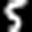

I think the digit is: 1


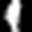

I think the digit is: 3


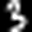

I think the digit is: 1


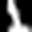

I think the digit is: 8


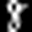

In [20]:
from google.colab.patches import cv2_imshow
random_indices = np.random.randint(0,high = len(testLabels), size=(5,))

for i in random_indices:
  image = testData[i]
  prediction = model.predict(image.reshape(1,-1))[0]
  image = image.reshape((8,8)).astype("uint8")
  image = exposure.rescale_intensity(image,out_range=(0,255))
  image = imutils.resize(image, width=32,inter=cv2.INTER_CUBIC)
  print("I think the digit is: {}".format(prediction))
  cv2_imshow(image)